## Goals of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Imports

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler

### Read Data 

In [4]:
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#checking shape
df.shape

(9240, 37)

We have 9240 rows and 37 columns in our leads dataset.

In [6]:
#Info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

All the dataypes of the variables are in correct format.

In [7]:
# more info 
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [8]:
#checking null values in each rows

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('Select',np.nan)

In [10]:
# checking the columns for null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#checking percentage of null values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# dropping the columns with missing values greater than or equal to 40% .

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 40):
        df.drop(i, 1, inplace = True)

In [13]:
#checking null values percentage

round(100*(df.isnull().sum()/len(df.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

From above description about counts, we can see that there are missing values present in our data.

##### Column :Country

In [14]:
#checking value counts of Country column

df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

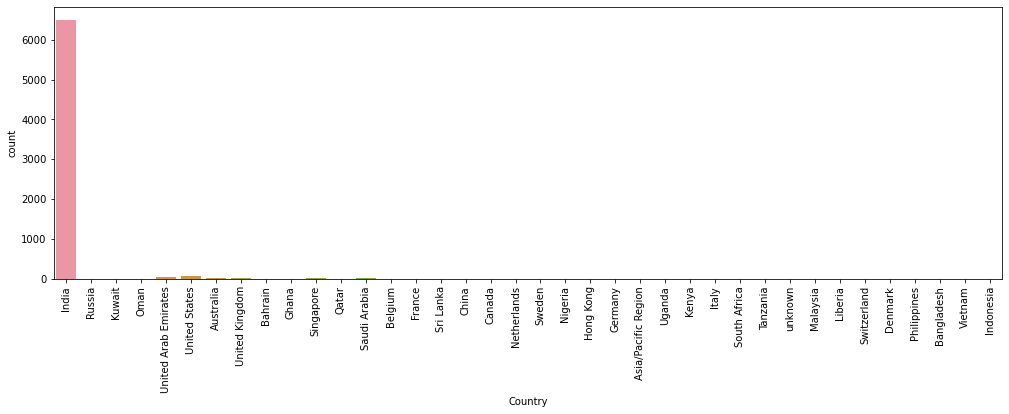

In [15]:
plt.figure(figsize=(17,5))
sns.countplot(df['Country'])
plt.xticks(rotation=90)

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [16]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

df['Country'] = df['Country'].replace(np.nan,'India')

##### Column : city 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

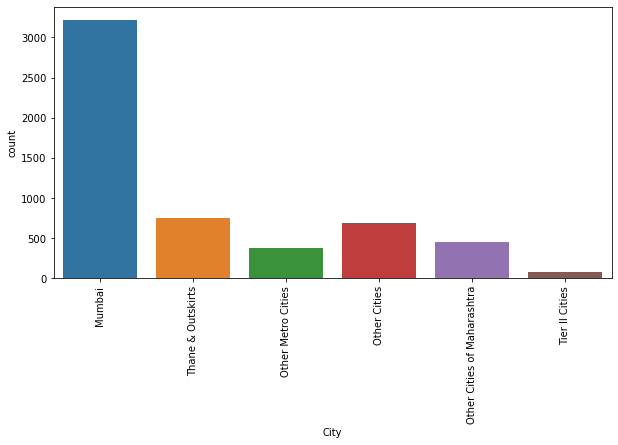

In [17]:
#plotting spread of City columnn 
plt.figure(figsize=(10,5))
sns.countplot(df['City'])
plt.xticks(rotation=90)

In [18]:
# Finding the percentage of the different categories of this column:
round(df['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [19]:
# Since most values are 'Mumbai' , we can impute missing values in this column with this value.
# Imputing the missing data in the 'City' column with 'Mumbai'
df['City']=df['City'].replace(np.nan,'Mumbai')

##### Column: Tags
This column has  36.29% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

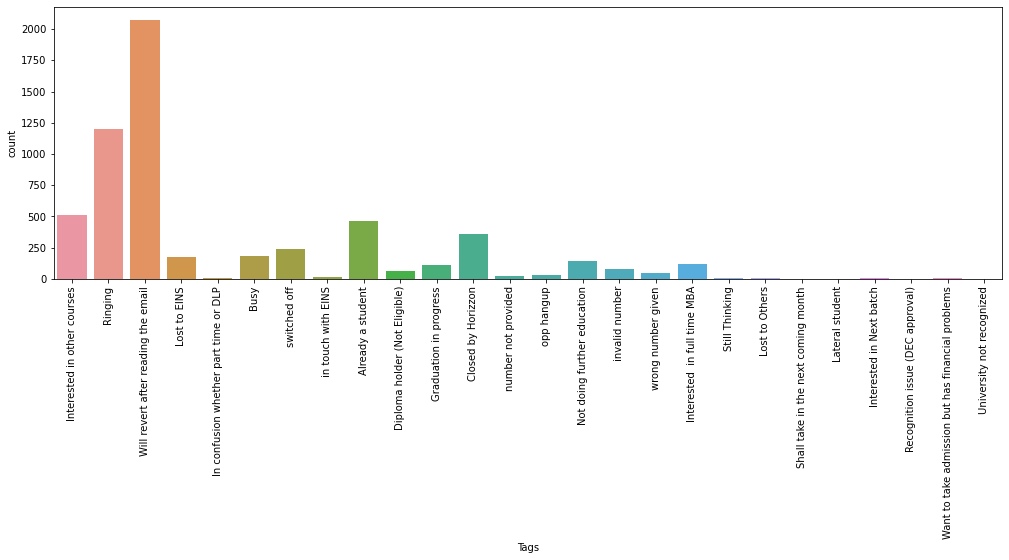

In [20]:
plt.figure(figsize=(17,5))
sns.countplot(df['Tags'])
plt.xticks(rotation=90)

In [21]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
df['Tags']=df['Tags'].replace(np.nan,'Will revert after reading the email')

##### Column: Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

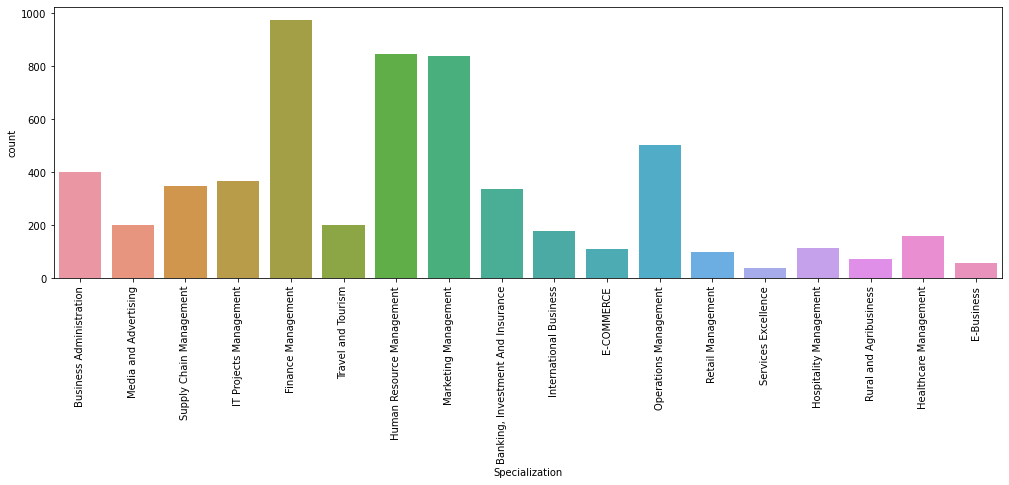

In [22]:
plt.figure(figsize=(17,5))
sns.countplot(df['Specialization'])
plt.xticks(rotation=90)

In [23]:
# Creating a separate category called 'Others' for this.
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

##### Column: 'What is your current occupation'

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

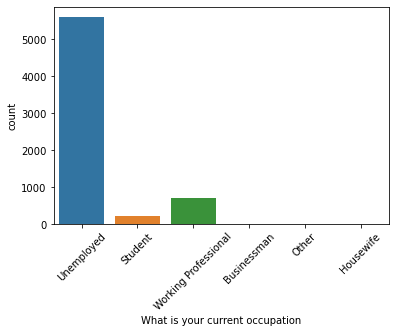

In [24]:
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=45)

In [25]:
# Finding the percentage of the different categories of this column:
round(df['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [26]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed')

##### Column: 'What matters most to you in choosing a course'

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

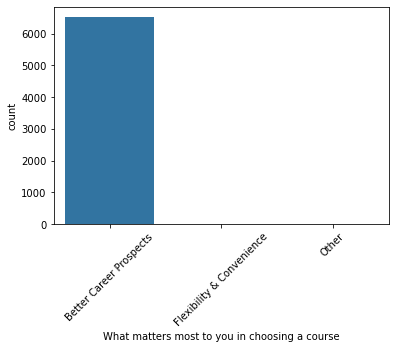

In [27]:
# Visualizing this column
sns.countplot(df['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [28]:
# Finding the percentage of the different categories of this column:
round(df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [29]:
#replacing Nan values with Mode "Better Career Prospects"
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [30]:
# Dropping this column as we can see that this is highly skewed column 
df=df.drop('What matters most to you in choosing a course',axis=1)

In [31]:
# Finding the null percentages across columns after removing the above columns
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Rest missing values are under 2% so we can drop these rows

In [32]:
# Dropping the rows with null values
df.dropna(inplace = True)

In [33]:
# Finding the null percentages across columns after removing the above columns
round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now we don't have any missing value in the dataset.

In [34]:
# Percentage of rows retained 
(len(df.index)/9240)*100

98.2034632034632

### Exploratory Data Analysis 

##### Checking for duplicates

In [35]:
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


We see there are no duplicate records found  in our lead dataset.

#### Univariate Analysis:

#### Categorical Variables

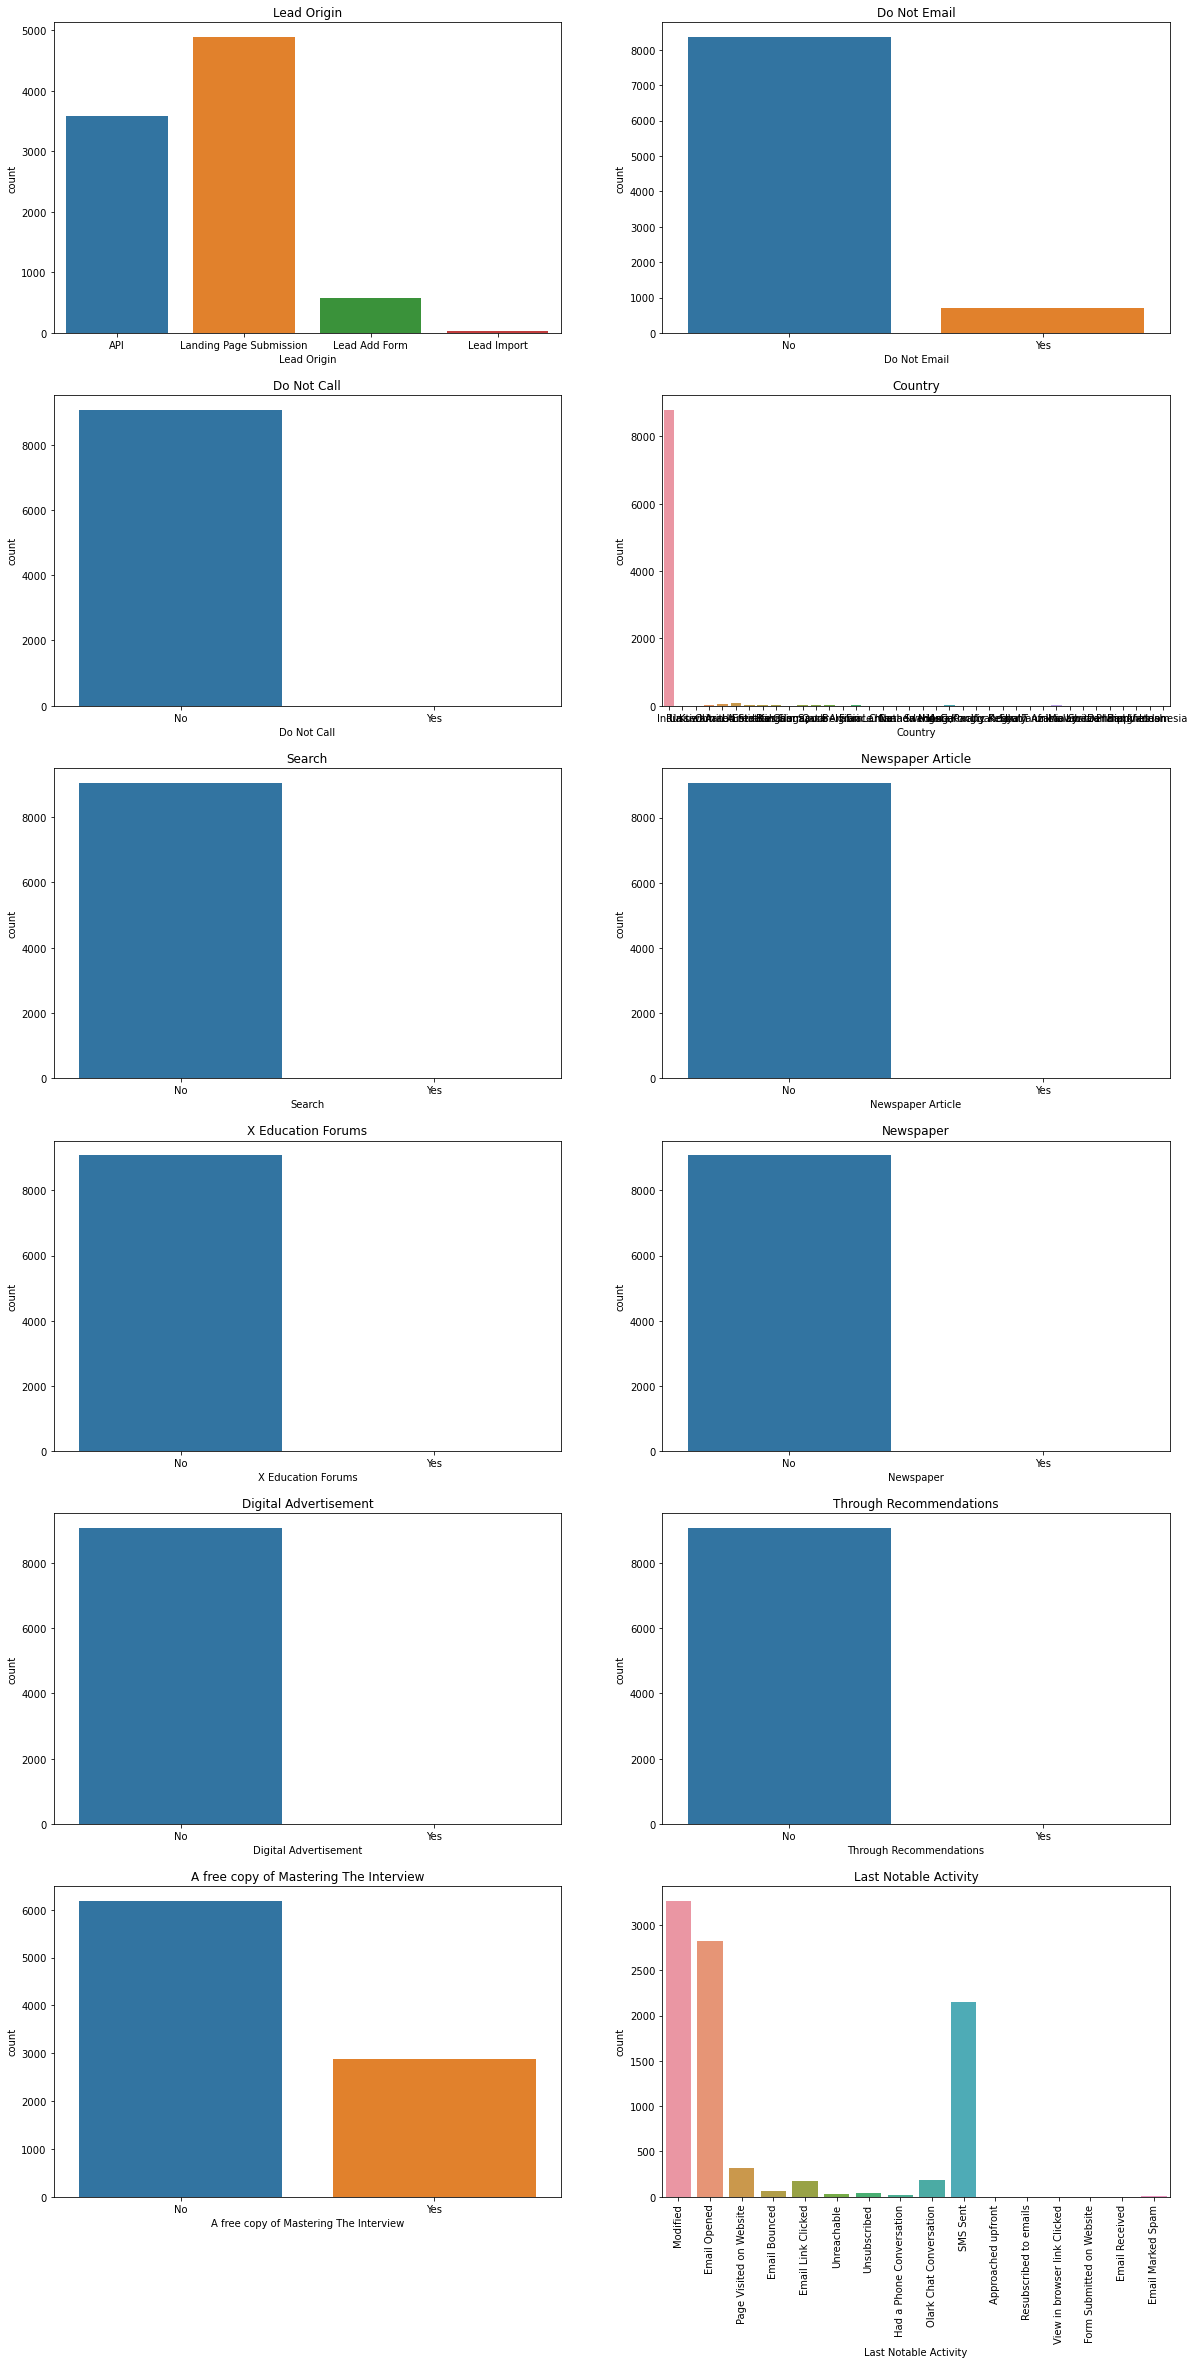

In [36]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()


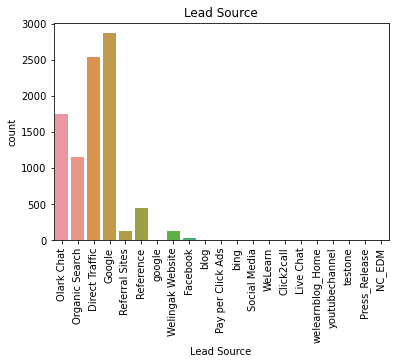

In [37]:
sns.countplot(df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

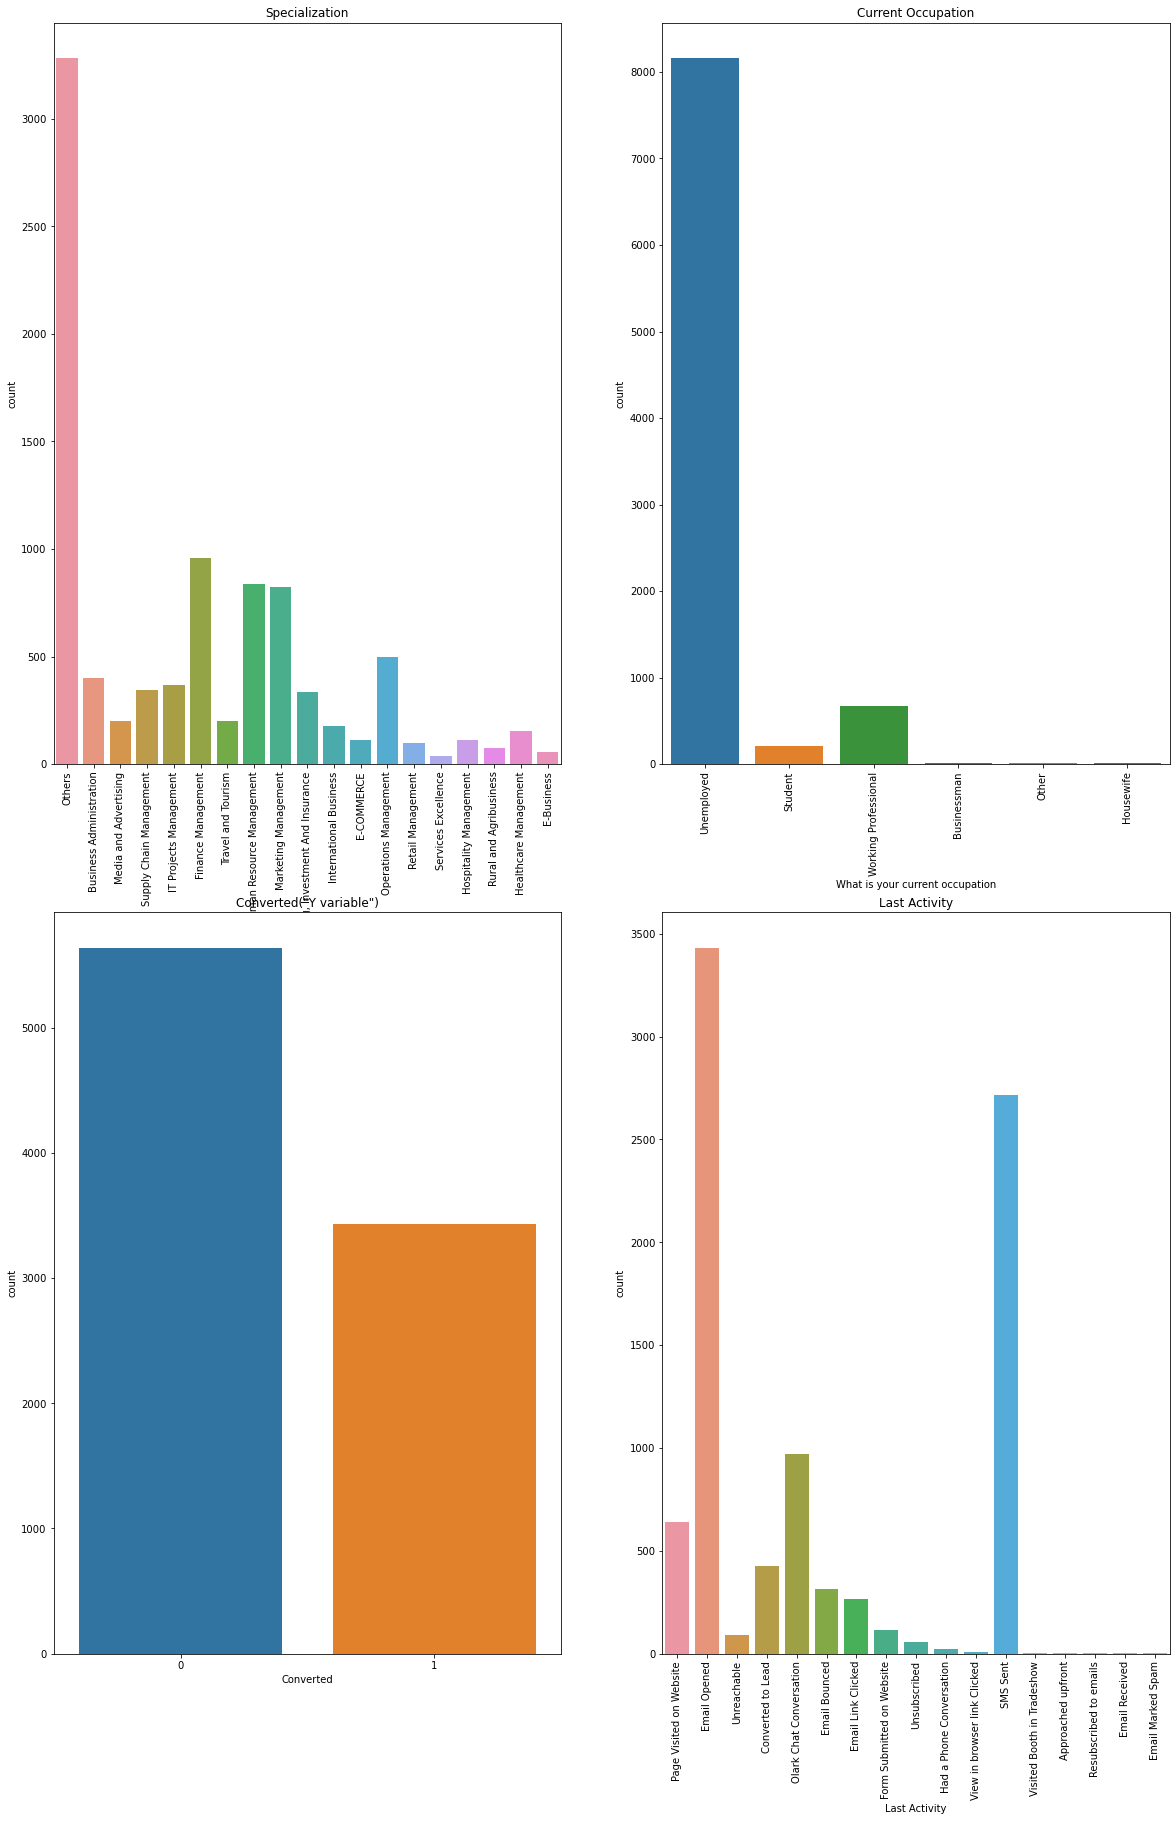

In [38]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.subplot(2,2,4)
sns.countplot(df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

#### Numerical variables

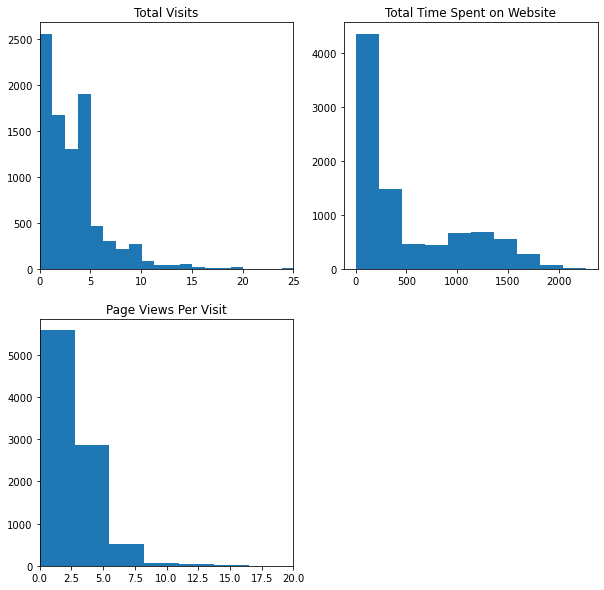

In [39]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

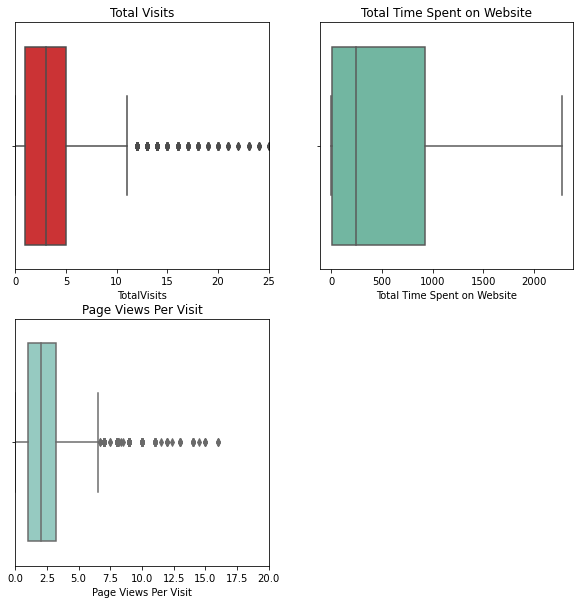

In [40]:
plt.figure(figsize = (10,10))
plt.subplot(221)
sns.boxplot(df['TotalVisits'],orient='vert',palette='Set1')
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
sns.boxplot(df['Total Time Spent on Website'],orient='vert',palette='Set2')
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.boxplot(df['Page Views Per Visit'],orient='vert',palette='Set3')
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

#### Bivariate Analysis 

#### 1. Converted
Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [41]:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted


37.85541106458012

#### 2.Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

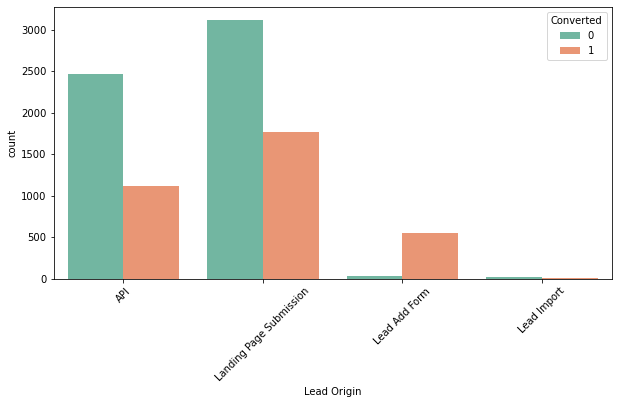

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df,palette='Set2')
plt.xticks(rotation = 45)

##### Inference :
API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
Lead Add Form has more than 90% conversion rate but count of lead are not very high.
Lead Import are very less in count.
#### To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.



#### 3. Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

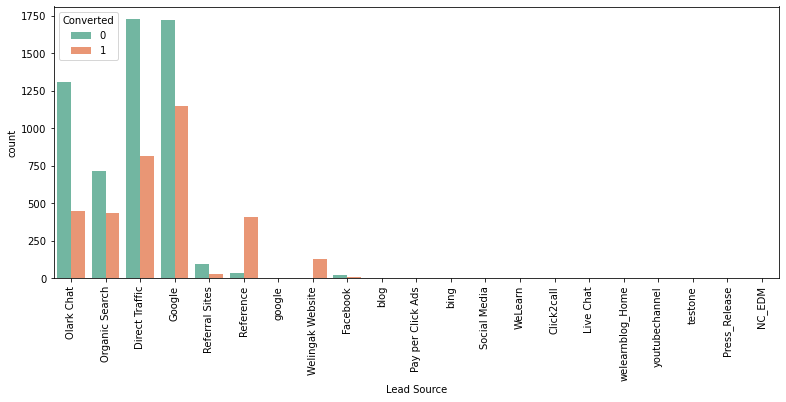

In [43]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df, palette='Set2')
plt.xticks(rotation = 90)

In [44]:
# Need to replace 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

In [45]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

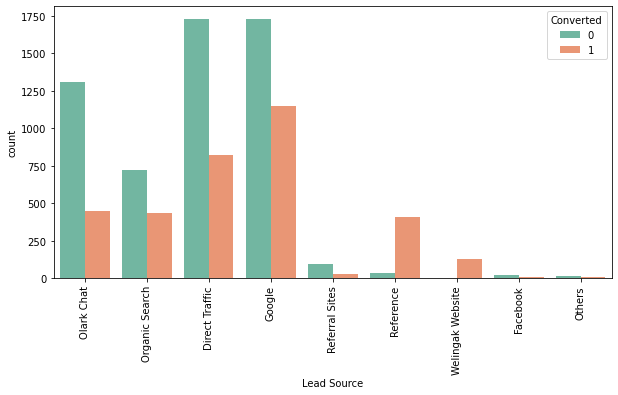

In [46]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df,palette='Set2')
plt.xticks(rotation = 90)

#### Inference
Google and Direct traffic generates maximum number of leads.
Conversion Rate of reference leads and leads through welingak website is high.
#### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

#### 4.Do Not Email & Do Not Call

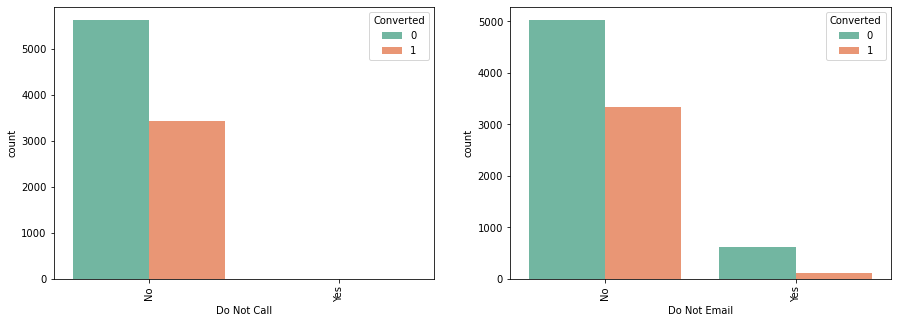

In [47]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(x = "Do Not Call", hue = "Converted", data = df,palette='Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x = "Do Not Email", hue = "Converted", data = df,palette='Set2')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

##### Inference
Most entries are 'No'. 

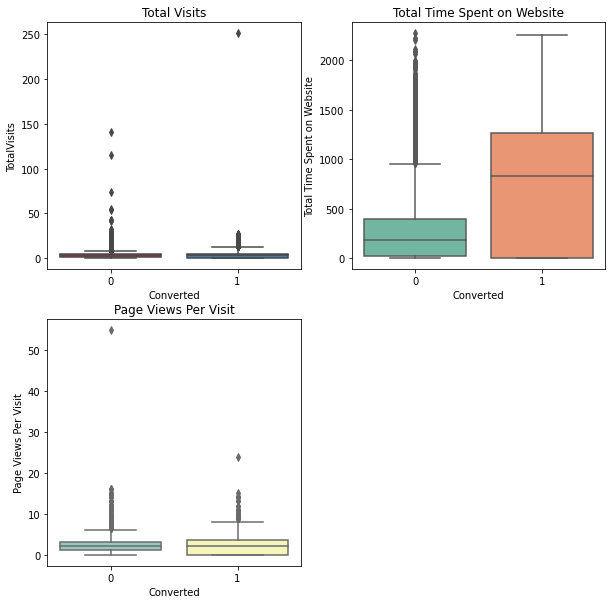

In [48]:
plt.figure(figsize = (10,10))
plt.subplot(221)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data =df,palette='Set1')
plt.title('Total Visits')

plt.subplot(222)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data =df,palette='Set2')
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df,palette='Set3')
plt.title('Page Views Per Visit')
plt.show()


###### Inference :
Median for converted and not converted leads are the same.Nothing can be concluded on the basis of Total Visits.
Median for converted and unconverted leads is the same.Nothing can be said specifically for lead conversion from Page Views Per Visit
Leads spending more time on the website are more likely to be converted

#### 5.Column : Specialization 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

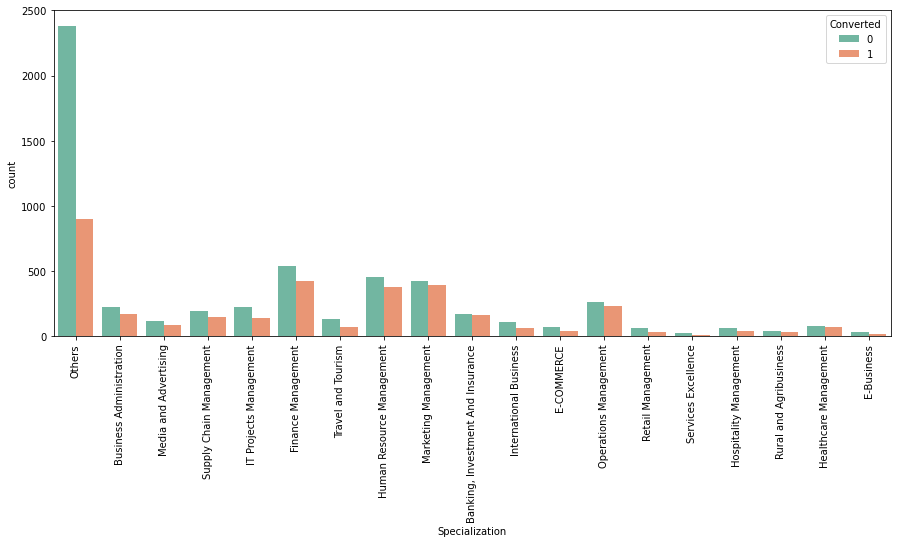

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = df,palette='Set2')
plt.xticks(rotation = 90)

##### Inference
Focus should be more on the Specialization with high conversion rate.

#### 6. What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

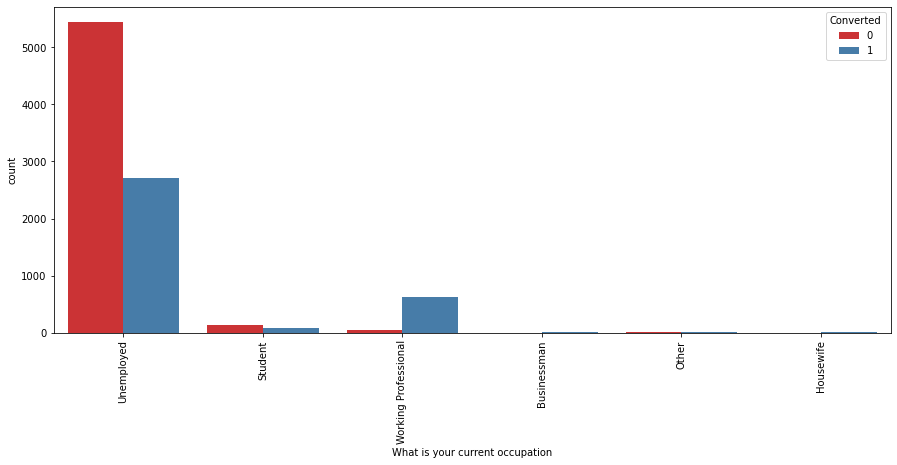

In [50]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)


##### Inference
Working Professionals going for the course have high chances of joining it.

In [51]:
df = df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

### Data Preparation

In [52]:
#Converting some binary variables (Yes/No) to 1/0
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[vars] = df[vars].apply(binary_map)

#### Creating Dummy variables

In [53]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
# Concatenating the dummy_data to the lead_data dataframe
df = pd.concat([df, dummy_data], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [55]:
# Dropping the columns for which dummies were created
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [56]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Splitting the data into train and test set

In [57]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Prospect ID','Converted'], axis=1)
X.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [58]:
# Putting target variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=90)

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 8204 to 4026
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   Do Not Call                                           6351 non-null   int64  
 2   TotalVisits                                           6351 non-null   float64
 3   Total Time Spent on Website                           6351 non-null   int64  
 4   Page Views Per Visit                                  6351 non-null   float64
 5   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 7   Lead Origin_Lead Import                               6351 non-null   uint8  
 8   Lead Source_Facebook                                  6

#### Scaling the features

In [61]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8204,-0.285933,-0.017749,-0.650357,-0.888044,-1.077288,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1027,-0.285933,-0.017749,-0.274557,-0.455122,-0.159628,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
154,-0.285933,-0.017749,0.852843,1.447895,0.758033,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,-0.285933,-0.017749,0.477043,-0.523284,1.675694,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5808,-0.285933,-0.017749,-0.650357,-0.888044,-1.077288,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
# Checking the Lead Conversion rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

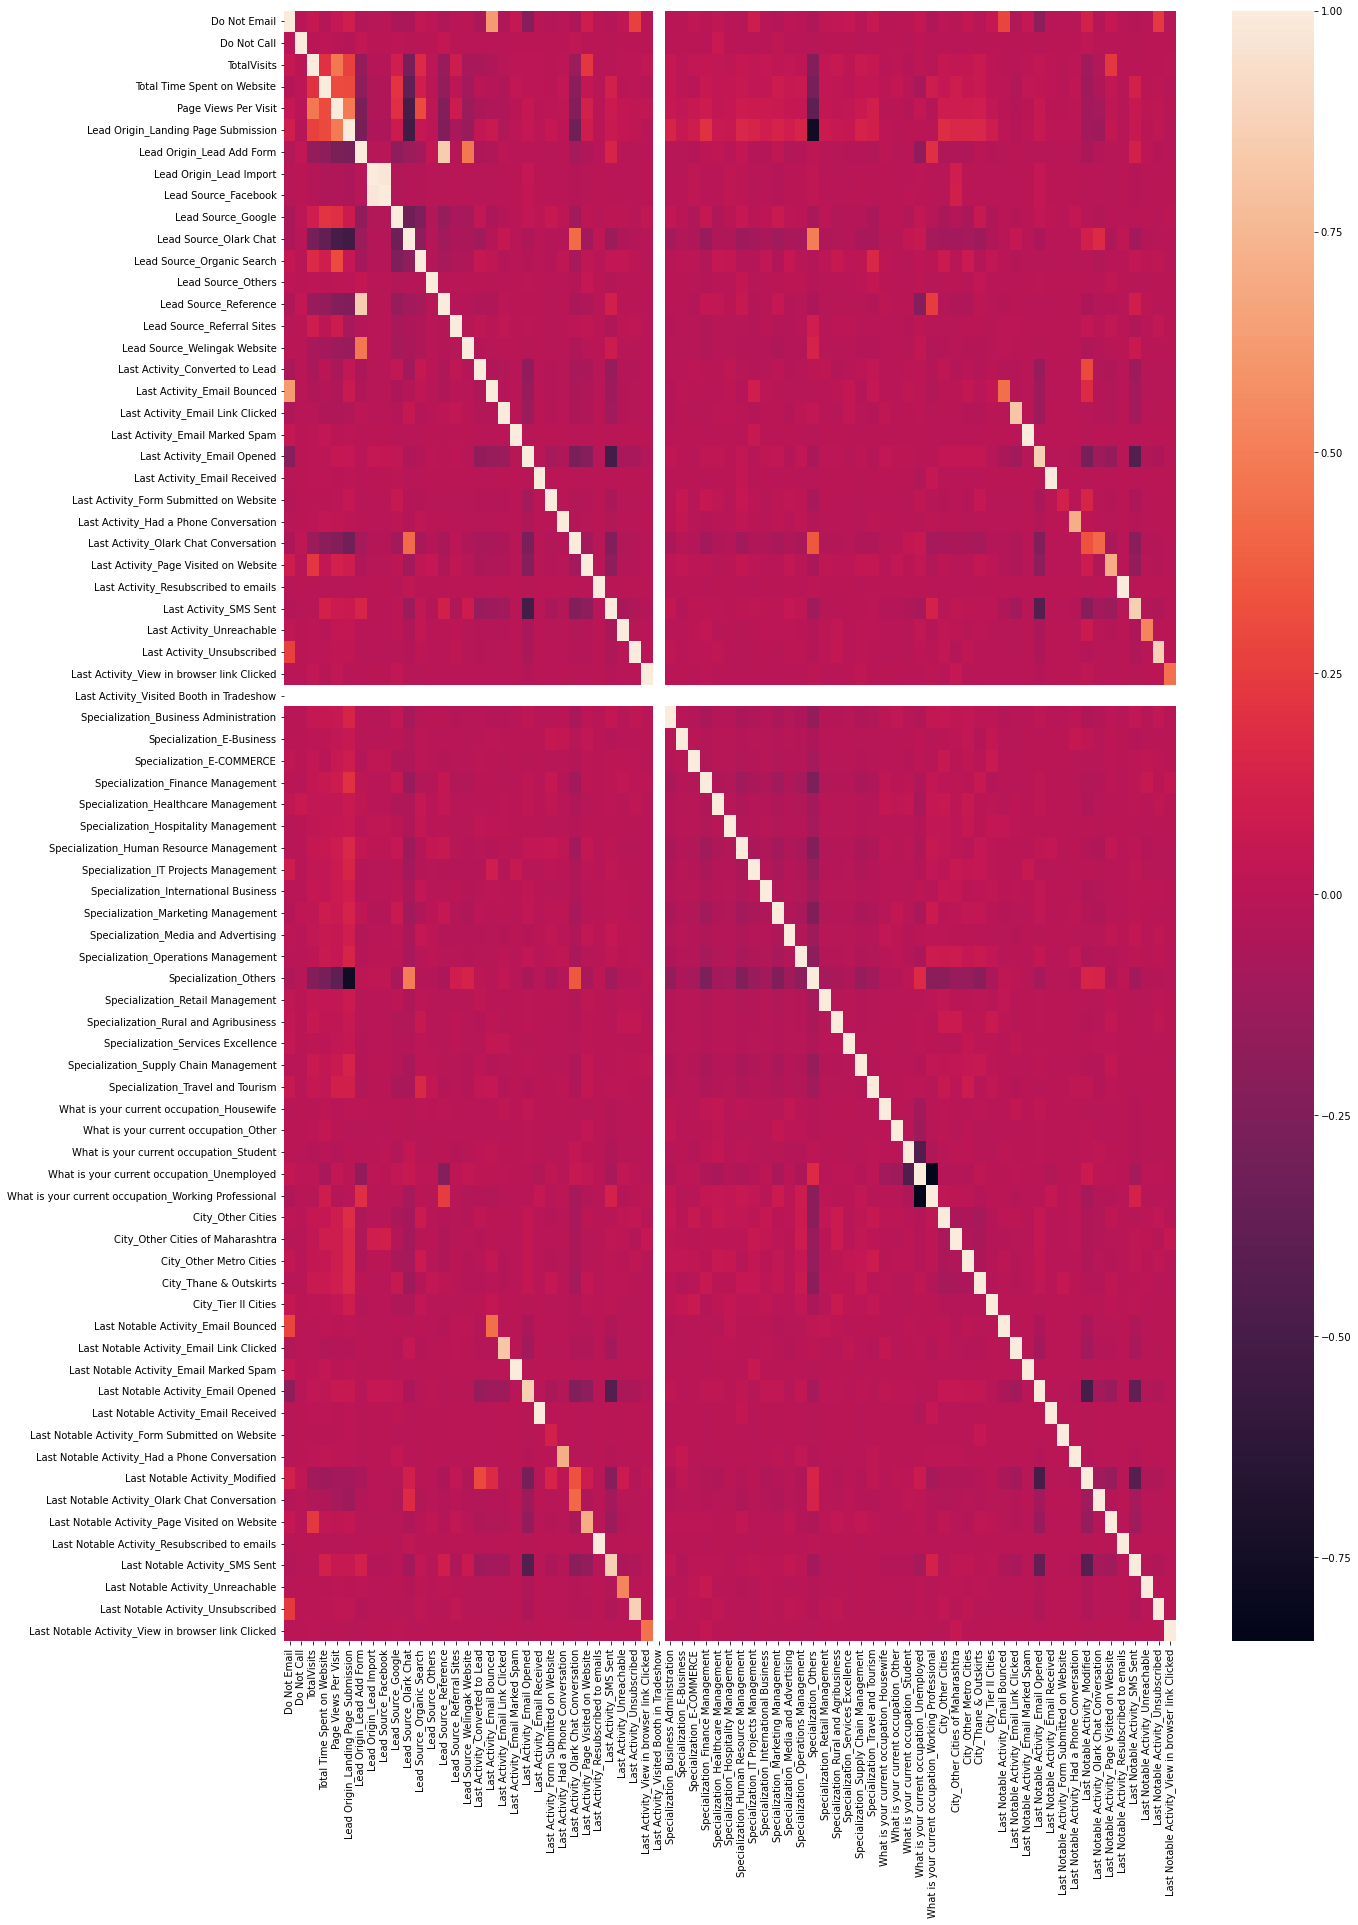

In [63]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

###  Model Building

In [64]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
# Import RFE
from sklearn.feature_selection import RFE
# Running RFE with 15 variables as output
 
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [65]:
rfe.support_

array([False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False])

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 14),
 ('Do Not Call', False, 44),
 ('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Others', False, 52),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 2),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 38),
 ('Last Activity_Email Marked Spam', False, 16),
 ('Last Activity_Email Opened', False, 18),
 ('Last Activity_Email Received', False, 48),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Had a Phone Conversation',

In [67]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

### Model Building

###### Model-1

In [68]:
import statsmodels.api as sm

In [69]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.0
Date:                Sun, 23 Oct 2022   Deviance:                       5296.1
Time:                        12:14:47   Pearson chi2:                 6.48e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4348      0.123     -3.522      0.000      -0.677      -0.193
Total Time Spent on Website                              1.0884      0.040     27.528      0.000       1.011       1.166
Lead Origin_Landing Page Submission                     -1.0833      0.128     -8.477      0.000      -1.334      -0.833
Lead Origin_Lead Add Form                                3.1897      0.237     13.462      0.000       2.725       3.654
Lead Source_Olark Chat                                   1.1383      0.122      9.344      0.000       0.900       1.377
Lead Source_Welingak Website                            23.1093   1.21e+04      0.002      0.998   -2.37e+04    2.38e+04
Last Activity_Email Bounced                             -2.8618      0.562     -5.093      0.000      -3.963      -1.761
Last Activity_Had a Phone Conversation                   1.2238      0.844      1.451      0.147      -0.429       2.877
Last Activity_Olark Chat Conversation                   -1.4880      0.166     -8.962      0.000      -1.813      -1.163
Specialization_Others                                   -1.1284      0.123     -9.183      0.000      -1.369      -0.888
What is your current occupation_Housewife               25.2931   4.51e+04      0.001      1.000   -8.84e+04    8.85e+04
What is your current occupation_Working Professional     2.7534      0.196     14.070      0.000       2.370       3.137
Last Notable Activity_Email Bounced                      2.0348      0.732      2.778      0.005       0.599       3.470
Last Notable Activity_Had a Phone Conversation           2.0752      1.410      1.472      0.141      -0.689       4.839
Last Notable Activity_SMS Sent                           1.5732      0.079     19.970      0.000       1.419       1.728
Last Notable Activity_Unreachable                        1.8211      0.568      3.205      0.001       0.707       2.935
========================================================================================================================
"""

Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [70]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

#### Model 2

In [71]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.8
Date:                Sun, 23 Oct 2022   Deviance:                       5307.6
Time:                        12:14:47   Pearson chi2:                 6.49e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4290      0.123     -3.480      0.001      -0.671      -0.187
Total Time Spent on Website                              1.0876      0.039     27.545      0.000       1.010       1.165
Lead Origin_Landing Page Submission                     -1.0811      0.128     -8.473      0.000      -1.331      -0.831
Lead Origin_Lead Add Form                                3.1931      0.237     13.487      0.000       2.729       3.657
Lead Source_Olark Chat                                   1.1368      0.122      9.337      0.000       0.898       1.375
Lead Source_Welingak Website                            23.1043   1.21e+04      0.002      0.998   -2.37e+04    2.38e+04
Last Activity_Email Bounced                             -2.8664      0.562     -5.104      0.000      -3.967      -1.766
Last Activity_Had a Phone Conversation                   1.2190      0.843      1.445      0.148      -0.434       2.872
Last Activity_Olark Chat Conversation                   -1.4904      0.166     -8.977      0.000      -1.816      -1.165
Specialization_Others                                   -1.1320      0.123     -9.221      0.000      -1.373      -0.891
What is your current occupation_Working Professional     2.7475      0.196     14.043      0.000       2.364       3.131
Last Notable Activity_Email Bounced                      2.0352      0.732      2.779      0.005       0.600       3.470
Last Notable Activity_Had a Phone Conversation           2.0719      1.410      1.469      0.142      -0.692       4.835
Last Notable Activity_SMS Sent                           1.5674      0.079     19.912      0.000       1.413       1.722
Last Notable Activity_Unreachable                        1.8143      0.568      3.193      0.001       0.701       2.928
========================================================================================================================
"""

Since Pvalue of 'Lead Source_Welingak Website' is very high, we can drop this column.

In [72]:
# Dropping the column 'Lead Source_Welingak Website'
col2 = col1.drop('Lead Source_Welingak Website')

#### Model 3

In [73]:
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.3
Date:                Sun, 23 Oct 2022   Deviance:                       5340.7
Time:                        12:14:47   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4840      0.123     -3.929      0.000      -0.725      -0.243
Total Time Spent on Website                              1.0876      0.039     27.565      0.000       1.010       1.165
Lead Origin_Landing Page Submission                     -1.0265      0.127     -8.066      0.000      -1.276      -0.777
Lead Origin_Lead Add Form                                3.8606      0.227     16.989      0.000       3.415       4.306
Lead Source_Olark Chat                                   1.1334      0.121      9.333      0.000       0.895       1.371
Last Activity_Email Bounced                             -2.8641      0.561     -5.110      0.000      -3.963      -1.766
Last Activity_Had a Phone Conversation                   1.1957      0.849      1.409      0.159      -0.468       2.859
Last Activity_Olark Chat Conversation                   -1.4981      0.166     -9.025      0.000      -1.823      -1.173
Specialization_Others                                   -1.0590      0.123     -8.642      0.000      -1.299      -0.819
What is your current occupation_Working Professional     2.7420      0.196     14.009      0.000       2.358       3.126
Last Notable Activity_Email Bounced                      2.1028      0.718      2.927      0.003       0.695       3.511
Last Notable Activity_Had a Phone Conversation           2.0974      1.413      1.485      0.138      -0.672       4.867
Last Notable Activity_SMS Sent                           1.5647      0.079     19.914      0.000       1.411       1.719
Last Notable Activity_Unreachable                        1.8112      0.569      3.181      0.001       0.695       2.927
========================================================================================================================
"""

Since Pvalue of 'Last Activity_Had a Phone Conversation' is very high, we can drop this column.

In [74]:
# Dropping the column 'Last Activity_Had a Phone Conversation'
col3 = col2.drop('Last Activity_Had a Phone Conversation')

#### Model 4

In [75]:
X_train_sm = sm.add_constant(X_train[col3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2671.3
Date:                Sun, 23 Oct 2022   Deviance:                       5342.6
Time:                        12:14:47   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4808      0.123     -3.905      0.000      -0.722      -0.239
Total Time Spent on Website                              1.0876      0.039     27.572      0.000       1.010       1.165
Lead Origin_Landing Page Submission                     -1.0273      0.127     -8.074      0.000      -1.277      -0.778
Lead Origin_Lead Add Form                                3.8588      0.227     16.986      0.000       3.414       4.304
Lead Source_Olark Chat                                   1.1294      0.121      9.307      0.000       0.892       1.367
Last Activity_Email Bounced                             -2.8672      0.561     -5.115      0.000      -3.966      -1.769
Last Activity_Olark Chat Conversation                   -1.5005      0.166     -9.040      0.000      -1.826      -1.175
Specialization_Others                                   -1.0567      0.122     -8.627      0.000      -1.297      -0.817
What is your current occupation_Working Professional     2.7452      0.196     14.035      0.000       2.362       3.129
Last Notable Activity_Email Bounced                      2.1022      0.719      2.926      0.003       0.694       3.510
Last Notable Activity_Had a Phone Conversation           3.2907      1.131      2.909      0.004       1.074       5.508
Last Notable Activity_SMS Sent                           1.5619      0.079     19.887      0.000       1.408       1.716
Last Notable Activity_Unreachable                        1.8084      0.569      3.176      0.001       0.692       2.924
========================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,2.05
6,Specialization_Others,1.91
5,Last Activity_Olark Chat Conversation,1.47
10,Last Notable Activity_SMS Sent,1.41
1,Lead Origin_Landing Page Submission,1.32
4,Last Activity_Email Bounced,1.31
0,Total Time Spent on Website,1.28
8,Last Notable Activity_Email Bounced,1.25
2,Lead Origin_Lead Add Form,1.24
7,What is your current occupation_Working Profes...,1.16


___All the VIF values are good and all the p-values are below 0.05. So we can fix model.

### Creating Predictions

In [78]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8204    0.948692
1027    0.273718
154     0.516662
7610    0.373928
5808    0.998794
4606    0.781519
703     0.083081
2866    0.483362
6384    0.981832
1141    0.785585
dtype: float64

In [79]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.94869227, 0.273718  , 0.51666174, 0.37392806, 0.99879389,
       0.78151882, 0.08308057, 0.4833618 , 0.9818316 , 0.78558457])

In [80]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.948692,8204
1,1,0.273718,1027
2,1,0.516662,154
3,0,0.373928,7610
4,1,0.998794,5808


In [81]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.948692,8204,1
1,1,0.273718,1027,0
2,1,0.516662,154,1
3,0,0.373928,7610,0
4,1,0.998794,5808,1


#### Model Evaluation

In [82]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [83]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3462  476]
 [ 747 1666]]


In [84]:
 #The confusion matrix indicates as below
 #Predicted     not_converted    converted
 #Actual
 #not_converted        3462      476
 #converted            747       1666  

In [85]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8074319004881121


That's around 81% accuracy with is a very good value

In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6904268545379196


In [88]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8791264601320468


In [89]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.12087353986795328


In [90]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7777777777777778


In [91]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8225231646471846


With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%

### Optimise Cut off (ROC Curve)

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [93]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

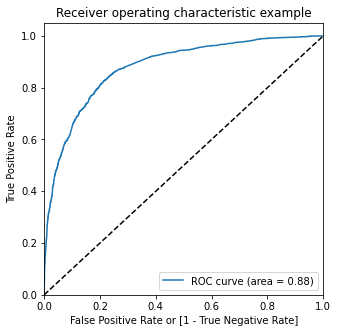

In [94]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have higher (0.88) area under the ROC curve , therefore our model is a good one.

#### Finding Optimal Cutoff Point

In [95]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.948692,8204,1,1,1,1,1,1,1,1,1,1,1
1,1,0.273718,1027,0,1,1,1,0,0,0,0,0,0,0
2,1,0.516662,154,1,1,1,1,1,1,1,0,0,0,0
3,0,0.373928,7610,0,1,1,1,1,0,0,0,0,0,0
4,1,0.998794,5808,1,1,1,1,1,1,1,1,1,1,1


In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379940  1.000000  0.000000
0.1   0.1  0.589199  0.968090  0.357034
0.2   0.2  0.734845  0.916701  0.623413
0.3   0.3  0.795780  0.847907  0.763840
0.4   0.4  0.806015  0.771239  0.827324
0.5   0.5  0.807432  0.690427  0.879126
0.6   0.6  0.796253  0.583920  0.926359
0.7   0.7  0.781137  0.505180  0.950229
0.8   0.8  0.747914  0.382511  0.971813
0.9   0.9  0.718627  0.278492  0.988319


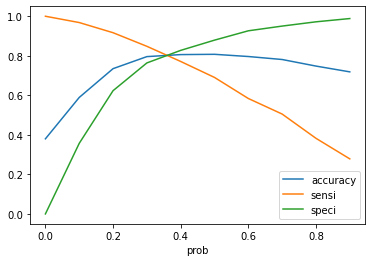

In [97]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.948692,8204,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.273718,1027,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.516662,154,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.373928,7610,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.998794,5808,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score to the Training data

In [99]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.948692,8204,1,1,1,1,1,1,1,1,1,1,1,1,95
1,1,0.273718,1027,0,1,1,1,0,0,0,0,0,0,0,0,27
2,1,0.516662,154,1,1,1,1,1,1,1,0,0,0,0,1,52
3,0,0.373928,7610,0,1,1,1,1,0,0,0,0,0,0,1,37
4,1,0.998794,5808,1,1,1,1,1,1,1,1,1,1,1,1,100


In [100]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8014485907731066


In [101]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3109,  829],
       [ 432, 1981]], dtype=int64)

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8209697472026523


In [104]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7894870492635856


In [105]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.21051295073641443


In [106]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.704982206405694


In [107]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8780005648121999


### Precision and Recall

In [108]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3462,  476],
       [ 747, 1666]], dtype=int64)

In [109]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7777777777777778


In [110]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6904268545379196


### Precision and recall tradeoff

In [111]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       1
        ..
 6346    1
 6347    0
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [112]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

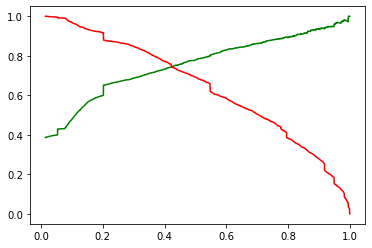

In [113]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [114]:
num_cols1=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols1] = scaler.fit_transform(X_test[num_cols1])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2012,-0.308048,0.0,-0.406785,0.966179,-0.199494,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5587,-0.308048,0.0,-0.970202,-0.880266,-1.144863,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6850,-0.308048,0.0,1.565172,0.100147,3.109295,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5231,-0.308048,0.0,-0.970202,-0.880266,-1.144863,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9046,-0.308048,0.0,1.001756,1.563505,2.163927,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col3]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
2012,0.966179,0,0,0,0,0,1,0,0,0,0,0
5587,-0.880266,0,0,1,0,0,1,0,0,0,0,0
6850,0.100147,1,0,0,0,0,0,0,0,0,1,0
5231,-0.880266,0,0,1,0,0,1,0,0,0,1,0
9046,1.563505,1,0,0,0,0,0,0,0,0,0,0


In [116]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2012    0.380680
5587    0.203335
6850    0.540578
5231    0.548915
9046    0.547956
220     0.994324
1029    0.053857
8190    0.949102
8046    0.093635
6373    0.548915
dtype: float64

In [117]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [118]:
# Let's see the head
y_pred_1.head()

,0
2012,0.380680
5587,0.203335
6850,0.540578
5231,0.548915
9046,0.547956


In [119]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [120]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [121]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [122]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [123]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,2012,0.380680
1,0,5587,0.203335
2,0,6850,0.540578
3,1,5231,0.548915
4,1,9046,0.547956


In [124]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [125]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [126]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,2012,1,0.380680
1,5587,0,0.203335
2,6850,0,0.540578
3,5231,1,0.548915
4,9046,1,0.547956


In [127]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [128]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,2012,1,0.380680,1
1,5587,0,0.203335,0
2,6850,0,0.540578,1
3,5231,1,0.548915,1
4,9046,1,0.547956,1


In [129]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))


Accuracy : 0.8016893132574366


In [130]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1357,  344],
       [ 196,  826]], dtype=int64)

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8082191780821918


In [133]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7977660199882423


In [134]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.705982905982906

In [135]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8082191780821918

### Assigning Lead Score to the Testing data

In [136]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,2012,1,0.380680,1,38
1,5587,0,0.203335,0,20
2,6850,0,0.540578,1,54
3,5231,1,0.548915,1,55
4,9046,1,0.547956,1,55


## Observations:
After running the model on the Test Data , we obtain:

    Accuracy : 80.1 %
    Sensitivity : 80.8 %
    Specificity : 79.7 %

## Results :
### Comparing the values obtained for Train & Test:
##### Train Data:
    Accuracy : 80%
    Sensitivity : 82 %
    Specificity :79 %
##### Test Data:
    Accuracy : 80 %
    Sensitivity : 81 %
    Specificity : 78 %
 
 Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

In [137]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
5,220,1,0.994324,1,99
7,8190,0,0.949102,1,95
30,2854,1,0.974185,1,97
36,2221,0,0.881634,1,88
47,1770,1,0.887976,1,89
...,...,...,...,...,...
2647,8474,0,0.936128,1,94
2669,6890,1,0.949102,1,95
2707,8055,1,0.998804,1,100
2708,2684,1,0.998804,1,100


In [138]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([ 220, 8190, 2854, 2221, 1770, 4382, 5915, 8059, 2734, 6722, 1927,
       3762, 5502, 5364, 7905, 3291, 2806, 5933, 5032, 4125, 2337, 5212,
       8073, 7053, 4734, 6608, 1552, 8104, 7167, 7490,  810, 4005, 5362,
       2118, 8904, 4003, 6028,  353, 4371, 2140, 4982, 3735, 7105, 1408,
       4281, 5799, 2713, 5541, 8540, 2571, 2443, 8366, 5818, 2789, 2266,
       1926,  846, 2630, 6408, 3019, 5206, 3473, 7268, 4330, 5453, 8314,
       2376, 4832, 3407, 6884, 8495, 2722, 5714, 8687, 2128, 2673, 1406,
       4002, 5785, 4375, 7883, 8568, 6684, 8745, 8592, 4625, 5535, 8065,
       5804, 1292, 7259, 6314, 3113,  818, 2841, 6736, 6332, 6499, 5175,
       7448, 4028, 1559, 1714, 2617,  548, 6645, 4773, 8286, 6892,   98,
       6778, 5460, 4216,  997, 4365, 4803, 4540, 8030, 2043,  112, 7606,
       5769, 8229, 9022, 3042, 9232, 1263, 6175, 1116, 7501, 4187, 7166,
        784, 6315, 4705, 4750, 3444, 5739, 5019,  623, 1416, 5822, 2105,
       7191,  622, 4971, 5559, 4461, 7978, 2686, 76

In [139]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.858775
Last Notable Activity_Had a Phone Conversation          3.290732
What is your current occupation_Working Professional    2.745218
Last Notable Activity_Email Bounced                     2.102248
Last Notable Activity_Unreachable                       1.808373
Last Notable Activity_SMS Sent                          1.561865
Lead Source_Olark Chat                                  1.129358
Total Time Spent on Website                             1.087643
const                                                  -0.480830
Lead Origin_Landing Page Submission                    -1.027291
Specialization_Others                                  -1.056691
Last Activity_Olark Chat Conversation                  -1.500482
Last Activity_Email Bounced                            -2.867247
dtype: float64

### Conclusion 

    Lead Origin_Lead Add Form are the ones the to whom the calls should be made as conversion rate is high
    The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
    The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
    The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
    The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.